In [1]:
import pandas as pd

# loading data set as Pandas dataframe
df = pd.read_csv('cybersecurity_attacks_fully_encoded.csv')
print(df.head())


   Source Port  Destination Port  Packet Length  Anomaly Scores  \
0        31225             17616            503           28.67   
1        17245             48166           1174           51.50   
2        16811             53600            306           87.42   
3        20018             32534            385           15.79   
4         6131             26646           1462            0.52   

   Timestamp_encoded  Source IP Address_encoded  \
0              36141                        939   
1               6759                      35826   
2              30425                      32917   
3              37100                      12598   
4              37488                      34515   

   Destination IP Address_encoded  Protocol_encoded  Packet Type_encoded  \
0                           37091                 0                    1   
1                           33418                 0                    1   
2                           19496                 2           

In [2]:
# Unique attack signatures and their counts
unique_signatures = df['Attack Signature_encoded'].value_counts()
print(unique_signatures)


Attack Signature_encoded
0    20076
1    19924
Name: count, dtype: int64


In [3]:
# Grouping by Attack Type and Signature
grouped_data = df.groupby(['Attack Type_encoded', 'Attack Signature_encoded']).size()
print(grouped_data)


Attack Type_encoded  Attack Signature_encoded
0                    0                           6698
                     1                           6730
1                    0                           6717
                     1                           6548
2                    0                           6661
                     1                           6646
dtype: int64


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'cybersecurity_attacks_fully_encoded.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Reinitialize the LabelEncoder
label_encoder = LabelEncoder()

# Assume the original 'Attack Signature' column is available before encoding
original_attack_signature_column = ['SignatureType1', 'SignatureType2', 'SignatureType3']  # Example original values
label_encoder.fit(original_attack_signature_column)

# Map 'SignatureType1' to its encoded value
try:
    signature_value = label_encoder.transform(['SignatureType1'])[0]

    # Filter payload data for the specific signature
    specific_signature_data = df[df['Attack Signature_encoded'] == signature_value]['Payload Data_encoded']
    print(specific_signature_data)
except ValueError as e:
    print(f"Error: {e}. Ensure 'SignatureType1' exists in the original Attack Signature column.")


1         2600
5        32437
7         2109
8        38177
12       10823
         ...  
39991    29432
39993    39211
39994     6388
39995    30008
39996    28652
Name: Payload Data_encoded, Length: 20076, dtype: int64


In [5]:
# Compare anomaly scores for each signature
df.groupby('Attack Signature_encoded')['Anomaly Scores'].describe()


,count,mean,std,min,25%,50%,75%,max
Attack Signature_encoded,,,,,,,,
0,20076.0,50.145609,28.862866,0.0,25.2075,50.210,75.11,100.00
1,19924.0,50.081092,28.844945,0.0,25.0900,50.545,74.92,99.99


In [6]:
# Cross-tabulate severity and attack signature
pd.crosstab(df['Severity Level_encoded'], df['Attack Signature_encoded'])


Attack Signature_encoded,0,1
Severity Level_encoded,,
0,6703,6679
1,6650,6533
2,6723,6712


In [7]:
X = df.drop(columns=['Attack Type_encoded'])  # Features
y = df['Attack Type_encoded']  # Target


In [8]:
print(df.columns.tolist())  # List all column names



['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores', 'Timestamp_encoded', 'Source IP Address_encoded', 'Destination IP Address_encoded', 'Protocol_encoded', 'Packet Type_encoded', 'Traffic Type_encoded', 'Payload Data_encoded', 'Malware Indicators_encoded', 'Alerts/Warnings_encoded', 'Attack Type_encoded', 'Attack Signature_encoded', 'Action Taken_encoded', 'Severity Level_encoded', 'User Information_encoded', 'Device Information_encoded', 'Network Segment_encoded', 'Geo-location Data_encoded', 'Proxy Information_encoded', 'Firewall Logs_encoded', 'IDS/IPS Alerts_encoded', 'Log Source_encoded']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Feature importance
print(clf.feature_importances_)


[0.07069865 0.07010437 0.07054153 0.07062219 0.07138769 0.07072292
 0.07040793 0.02038757 0.01192134 0.02009779 0.07074447 0.01214859
 0.01155476 0.01156663 0.01969134 0.01953772 0.06975466 0.07082025
 0.01965241 0.06975208 0.0424376  0.01164072 0.01250223 0.01130457]


In [10]:
# Print feature names and importances
feature_importances = clf.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")


Source Port: 0.07069864595129915
Destination Port: 0.07010437389543867
Packet Length: 0.07054152613757941
Anomaly Scores: 0.07062219180608177
Timestamp_encoded: 0.07138769441660708
Source IP Address_encoded: 0.07072292049412185
Destination IP Address_encoded: 0.07040793241442438
Protocol_encoded: 0.020387566795962205
Packet Type_encoded: 0.011921337999527753
Traffic Type_encoded: 0.020097794311112315
Payload Data_encoded: 0.07074446986187824
Malware Indicators_encoded: 0.012148589790318364
Alerts/Warnings_encoded: 0.011554763236184054
Attack Signature_encoded: 0.011566625324578006
Action Taken_encoded: 0.01969133605906788
Severity Level_encoded: 0.019537720487808764
User Information_encoded: 0.06975466102413201
Device Information_encoded: 0.07082024934611023
Network Segment_encoded: 0.019652406516840432
Geo-location Data_encoded: 0.0697520797741789
Proxy Information_encoded: 0.042437599673311455
Firewall Logs_encoded: 0.01164071897761572
IDS/IPS Alerts_encoded: 0.012502228400918499
Log

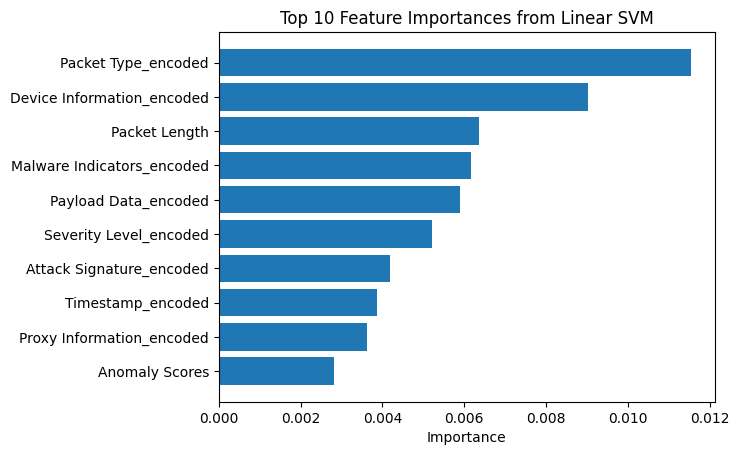

,Feature,Importance
8,Packet Type_encoded,0.011548
17,Device Information_encoded,0.009022
2,Packet Length,0.006357
11,Malware Indicators_encoded,0.006159
10,Payload Data_encoded,0.005898
15,Severity Level_encoded,0.005209
13,Attack Signature_encoded,0.004185
4,Timestamp_encoded,0.003880
20,Proxy Information_encoded,0.003614
3,Anomaly Scores,0.002827


In [12]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Linear SVM
svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_scaled, y)

# Feature importances (coefficients)
feature_importances = abs(svm.coef_[0])  # Absolute value of coefficients
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Linear SVM')
plt.gca().invert_yaxis()
plt.show()

importance_df


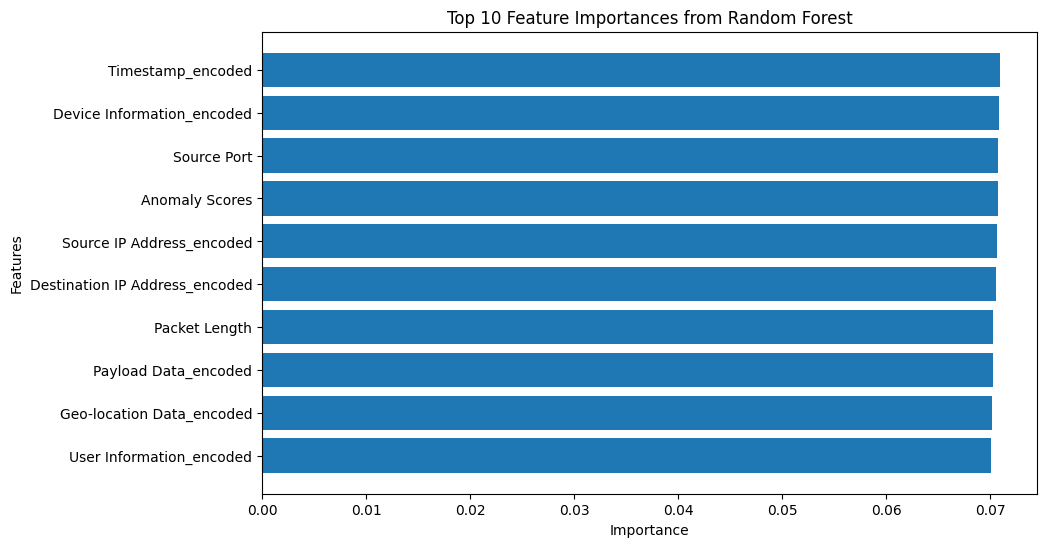

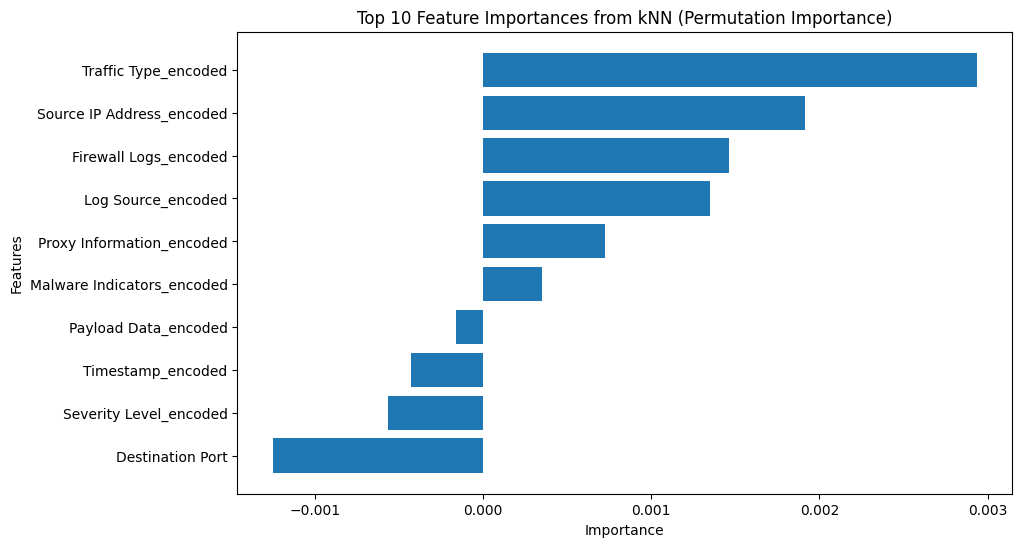

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Redefine features (X) and target (y)
y = df['Attack Type_encoded']
X = df.drop(columns=['Attack Type_encoded'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_feature_importances = rf_model.feature_importances_

# Random Forest Feature Importances
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize Random Forest feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'][:10], rf_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Train kNN (k-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Permutation importance for kNN
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Visualize kNN permutation importance
plt.figure(figsize=(10, 6))
plt.barh(knn_importance_df['Feature'][:10], knn_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances from kNN (Permutation Importance)')
plt.gca().invert_yaxis()
plt.show()


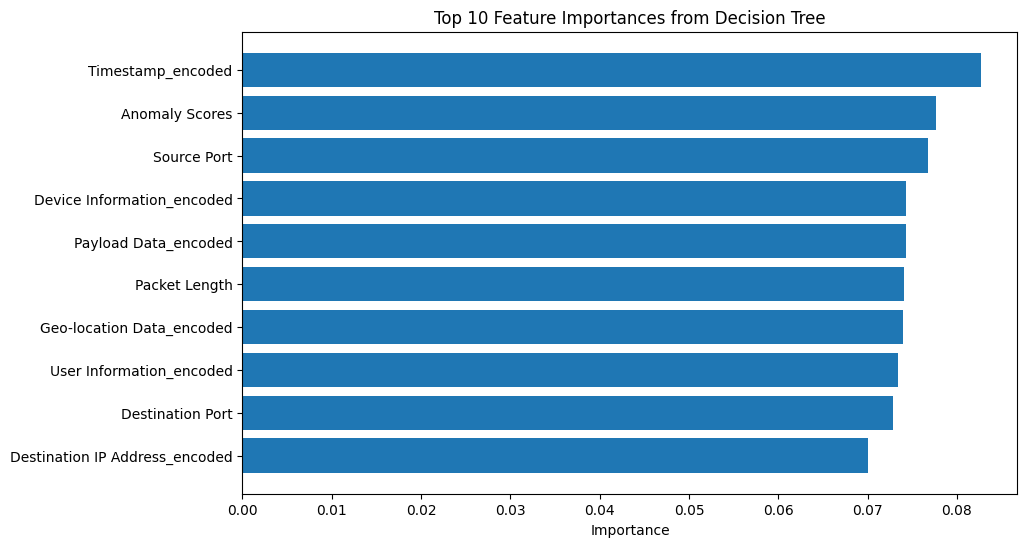

,Feature,Importance
4,Timestamp_encoded,0.082653
3,Anomaly Scores,0.077661
0,Source Port,0.076795
17,Device Information_encoded,0.074359
10,Payload Data_encoded,0.074282
2,Packet Length,0.074109
19,Geo-location Data_encoded,0.074003
16,User Information_encoded,0.073376
1,Destination Port,0.072862
6,Destination IP Address_encoded,0.070055


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances
feature_importances = dt.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

importance_df



In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mutual_info = mutual_info_classif(X, y)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mutual_info}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances using Mutual Information for Naive Bayes')
plt.show()

importance_df


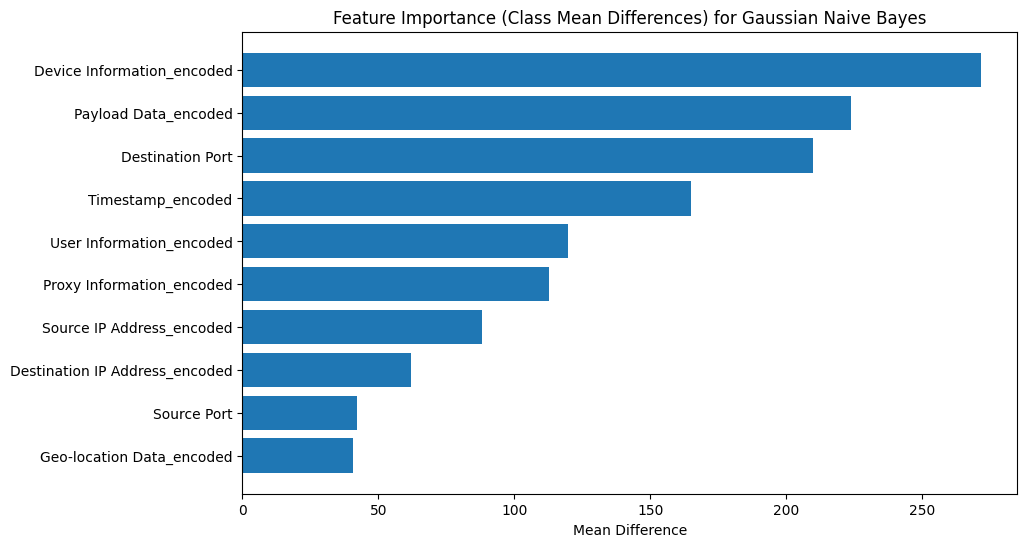

,Feature,MeanDifference
17,Device Information_encoded,271.542876
10,Payload Data_encoded,223.936687
1,Destination Port,209.841891
4,Timestamp_encoded,165.140516
16,User Information_encoded,119.695195
20,Proxy Information_encoded,112.586984
5,Source IP Address_encoded,88.152725
6,Destination IP Address_encoded,62.023101
0,Source Port,42.311285
19,Geo-location Data_encoded,40.539140


In [23]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Train a Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X, y)

# Calculate importance based on absolute differences between class means
class_means = nb.theta_
mean_differences = np.abs(class_means.max(axis=0) - class_means.min(axis=0))

# Create DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'MeanDifference': mean_differences}).sort_values(by='MeanDifference', ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['MeanDifference'][:10])
plt.xlabel('Mean Difference')
plt.title('Feature Importance (Class Mean Differences) for Gaussian Naive Bayes')
plt.gca().invert_yaxis()
plt.show()

importance_df